# Notebook Init

In [1]:
from os import getcwd, pardir
from os.path import join, abspath

# ! pip install jupyter_nbextensions_configurator jupyter_contrib_nbextensions
# ! jupyter contrib nbextension install
# ! jupyter nbextension install --py fileupload 
# ! jupyter nbextension enable --py fileupload
# ! jupyter nbextension install --py widgetsnbextension 
# ! jupyter nbextension enable --py widgetsnbextension
# ! jupyter nbextensions_configurator enable
# ! jupyter nbextension enable codefolding/main
# ! jupyter nbextension enable toc2/main

! jupyter nbextension enable --py --sys-prefix widgetsnbextension
# init_notebook_mode(connected=True)

## Get Root Directory
rootDirectory = abspath(join(abspath(join(getcwd(), pardir)), pardir))

# `do not disturb` mode
import warnings                                  
warnings.filterwarnings('ignore')

## Create a button that hides cells
from IPython.display import HTML

HTML(
    '''
    <script>
    code_show=true; 
    function code_toggle() {
        if (code_show){
            $('div.input').show();
        } else {
            $('div.input').hide();
        }
        code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# Load Data

In [2]:
from test_utils import *

testsDir = join(rootDirectory, 'smartcitizen-iscape-tests')

def loadButton(b):
    frequency = frequency_text.value + frequency_drop.value
    readings_selected = loadTest(frequency)
    
    for key in readings_selected.keys():
        try:
            readings[key] = dict()
            readings[key] = readings_selected[key]
        except NameError:
            global readings
            readings = dict()
            readings[key] = readings_selected[key]
    

def clearButton(b):
    
    global readings
    clearTests()
    readings = {}

display(widgets.HTML('<hr><h4>Import Local Tests</h4>'))

tests = getTests(testsDir)
interact(selectTests,
         x = widgets.SelectMultiple(options=tests, 
                           selected_labels = selectedTests, 
                           layout=widgets.Layout(width='700px')))

loadB = widgets.Button(description='Load Local Tests')
loadB.on_click(loadButton)

frequency_text = widgets.Text(description = 'Frequency',
                              value = '1',
                              layout = widgets.Layout(width='300px'))
frequency_drop = widgets.Dropdown(options = ['H', 'Min', 'S'],
                                  value = 'Min',
                                  description = '',
                                  layout = widgets.Layout(width='100px'))

frequency_box = widgets.HBox([frequency_text, frequency_drop])

resetB = widgets.Button(description='Clear Tests')
resetB.on_click(clearButton)

buttonBox = widgets.HBox([loadB, resetB])
totalBox = widgets.VBox([frequency_box, buttonBox])
display(totalBox)

------------------------------------------------------


## Test Load

Loading test **2018-07_INT_PMS5003_ON_OFF_LOW_PARTICLE_2** performed from 2018-07-31 to 2018-07-31

Test performed with commit **978d19d6ceaebad5552737d4637ec695870aa28b**

<hr />
<p><strong>Comment:</strong> </p>
<p>The purpose of this test is to determine the time needed to obtain representative readings in a one-shot mode.
Two Kits, each with one PM board and a PMS5003.
Open air, low levels of particles</p>

### KIT

#### KIT_1_ALTERNATE

Kit **KIT_1_ALTERNATE** located **Europe/Madrid**

Kit **KIT_1_ALTERNATE** has been loaded

#### KIT_2_CONTINUOUS

Kit **KIT_2_CONTINUOUS** located **Europe/Madrid**

Kit **KIT_2_CONTINUOUS** has been loaded

------------------------------------------------------
------------------------------------------------------


## Test Load

Loading test **2018-07_INT_PMS5003_ON_OFF_MID_PARTICLE** performed from 2018-07-31 to 2018-07-31

Test performed with commit **978d19d6ceaebad5552737d4637ec695870aa28b**

<hr />
<p><strong>Comment:</strong> </p>
<p>The purpose of this test is to determine the time needed to obtain representative readings in a one-shot mode.
Two Kits, each with one PM board and a PMS5003.
With a candle underneath them, for 100-500ug/m3 levels of particles</p>

### KIT

#### KIT_1_ALTERNATE

Kit **KIT_1_ALTERNATE** located **Europe/Madrid**

Kit **KIT_1_ALTERNATE** has been loaded

#### KIT_2_CONTINUOUS

Kit **KIT_2_CONTINUOUS** located **Europe/Madrid**

Kit **KIT_2_CONTINUOUS** has been loaded

------------------------------------------------------


# Plot tests

In [7]:
print readings.keys()
print readings['2018-07_INT_PMS5003_ON_OFF_LOW_PARTICLE_2']['devices'].keys()
print readings['2018-07_INT_PMS5003_ON_OFF_MID_PARTICLE']['devices'].keys()

['2018-07_INT_PMS5003_ON_OFF_MID_PARTICLE', '2018-07_INT_PMS5003_ON_OFF_LOW_PARTICLE_2']
['KIT_1_ALTERNATE', 'combined', 'KIT_2_CONTINUOUS']
['KIT_1_ALTERNATE', 'combined', 'KIT_2_CONTINUOUS']


This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]



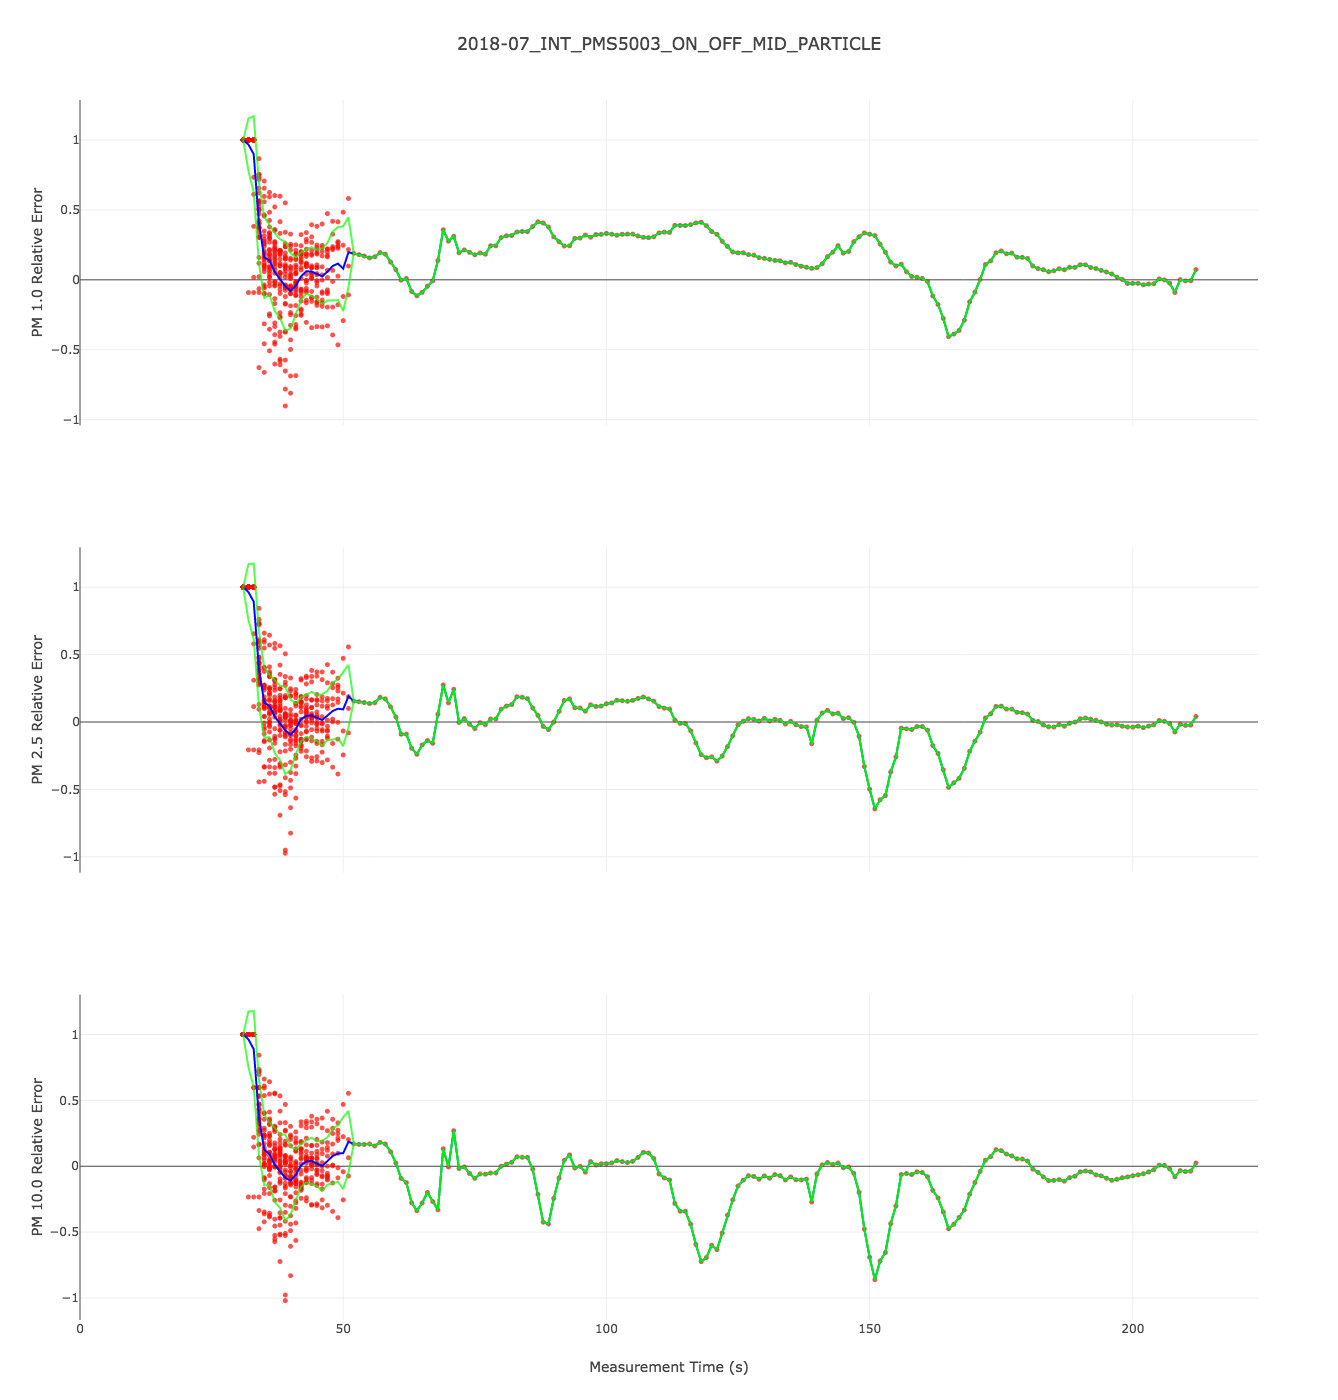

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]



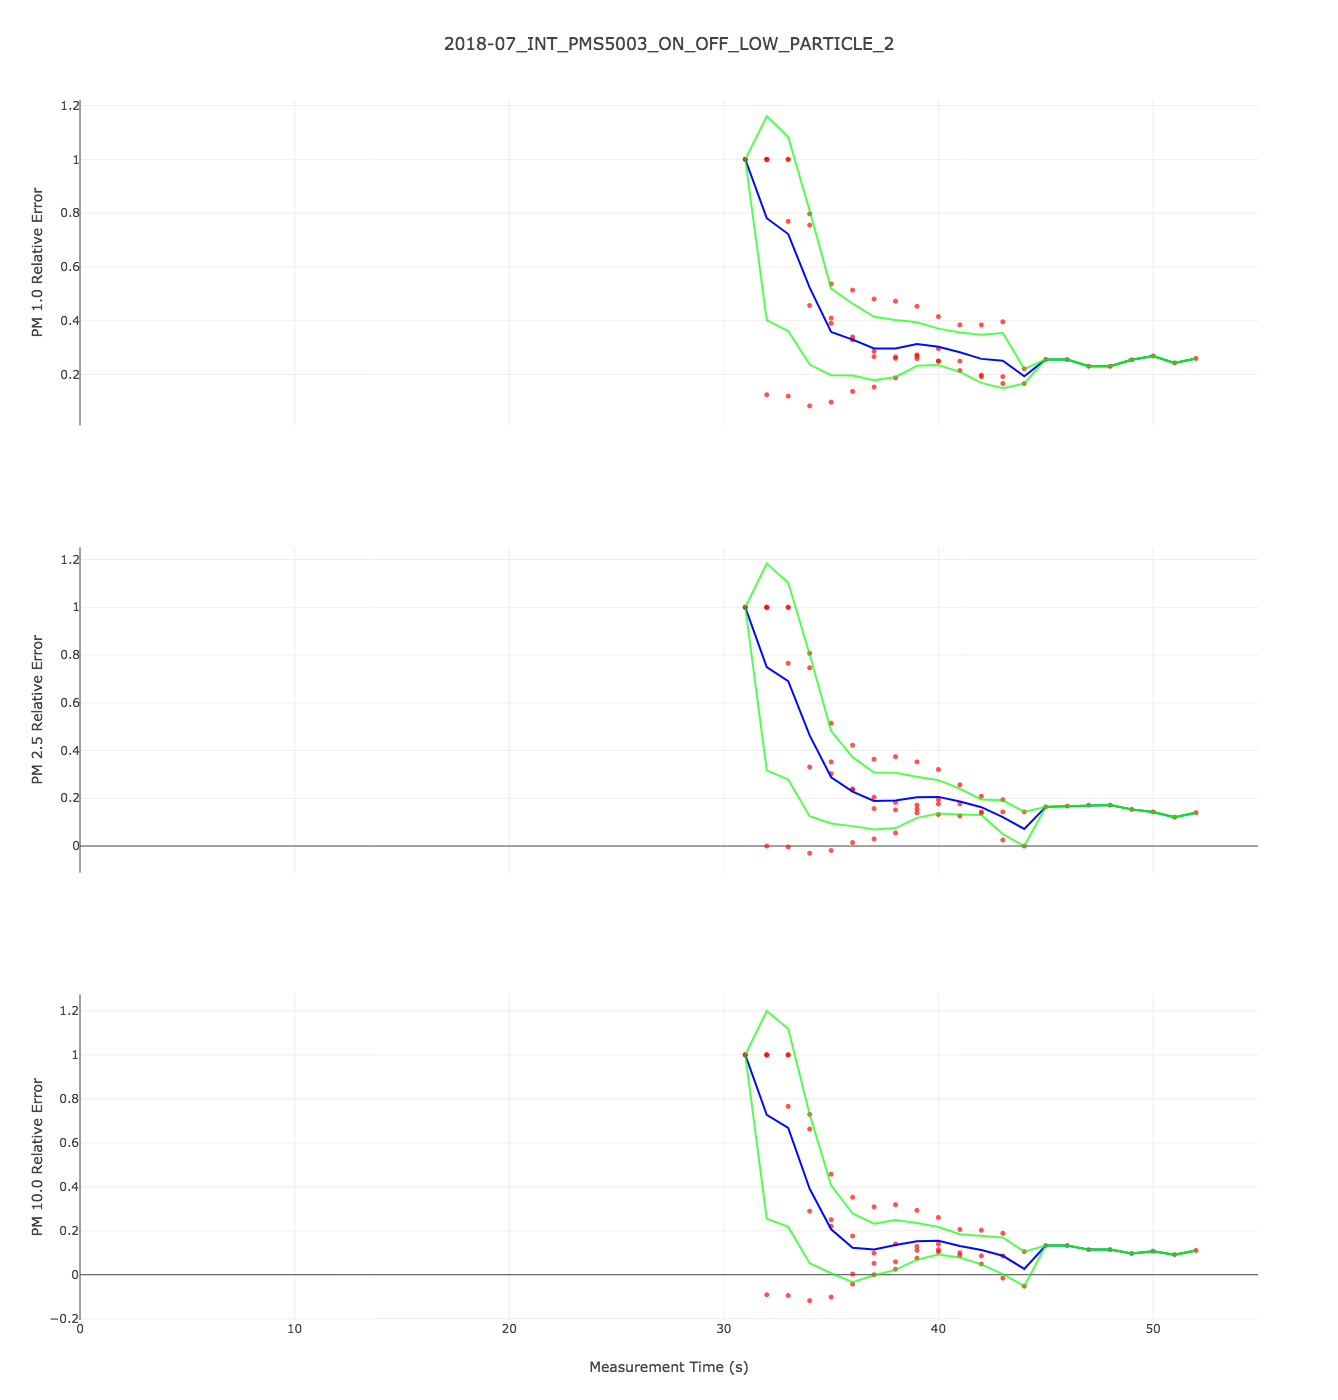

In [9]:
# Plot One-shot tests
from signal_utils import plot_oneshots

channels_pm = ['PM 1.0', 'PM 2.5', 'PM 10.0']
device_one_shot = 'KIT_1_ALTERNATE'
plot_oneshots(readings, channels_pm, device_one_shot)

## Conclusions

All the report is shown in: [PM Tests](https://hackmd.io/xaFO3464SmiWwqRr19he1A#ONOFF-Correlation-Tests)